## NumPy and Vectorization

*[Coding along with Python for Algorithmic Trading, Yves Hilpisch, O'Reilly, 1st edition November 2020, ISBN-13: 978-1492053354]*

In [163]:
# simulation with 1.000.000 repetitions done with pure Python
# computing Euler discretization of the geometric Brownian motion
# Euler discretization is a numerical method used to approximate the solution of ordinary differential equations (ODEs) 
# and stochastic differential equations (SDEs). It is a simple and widely used technique, named after Leonhard Euler, 
# who first proposed it.
import random
from math import exp, sqrt

In [164]:
S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

repetitions = 1000000

In [165]:
%time
for _ in range(repetitions):
    ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * random.gauss(0, 1) * sqrt(T))
    values.append(ST)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 μs


In [166]:
# Numpy approach with vectorization
import numpy as np

In [167]:
%time
# simulating all the values with a single line of NumPy code and storing them in a ndarray object
ST_np = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.random.standard_normal(repetitions) * np.sqrt(T))

CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 2.15 μs


## pandas the DataFrame Class

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
# https://www.squash.io/how-to-use-matplotlib-inline-in-python/
%matplotlib inline
from pylab import mpl, plt
plt.style.use("seaborn-v0_8")
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif' # imports and configures the plotting package

In [169]:
# importing configparser, reading credentials
c = configparser.ConfigParser()
c.read('../../../../../../../tmp/pyalgo/pyalgo.cfg') # yeah, that's a path in my local file system
ch0 = c.get('quandl','api_key')
print("Don't be a fool and send your api key to GitHub")

Don't be a fool and send your api key to GitHub


In [170]:
# Nasdaq Data Link Documentation https://docs.data.nasdaq.com/
# https://github.com/quandl/quandl-python
# import quandl # importing quandl wrapper
# quandl.ApiConfig.api_key = ch0 # providing api key
# quandl.ApiConfig.verify_ssl = False
# additional library to suppress "InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasdaq.com'"
# import urllib3
# urllib3.disable_warnings()

### replaced with nasdaq-data-link

In [171]:
import nasdaqdatalink as nq
nq.ApiConfig.api_key = ch0 # providing api key
nq.ApiConfig.verify_ssl = False
# additional library to suppress "InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasdaq.com'"
import urllib3
urllib3.disable_warnings()

In [172]:
# https://docs.data.nasdaq.com/docs/python-tables
# Example 1: Download data for Nokia (compnumber=39102)
data = nasdaqdatalink.get_table('MER/F1', compnumber="39102", paginate=True)
data.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
None,,,,,,,,,,,,,,,,,,,,,
0,39102,1851368960,-9087,10.446851,2010-12-31,A,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,Total Assets Per Share,Balance Sheet
1,39102,1851369024,-9087,10.446851,2010-12-31,Q4,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,Total Assets Per Share,Balance Sheet
2,39102,1885110592,-1465,0.642525,2012-12-31,Q4,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,Free Cash Flow Per Share,Derived
3,39102,1885110592,-5370,8.596581,2012-12-31,Q4,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,Revenue Per Share,Income Statement
4,39102,1851368960,-1012,3.392546,2010-12-31,A,N,EUR,True,Nokia Corp,...,Espoo,None,FIN,Fl-02610,(358) 10 44 88 000,(358) 10 44 81 002,www.nokia.com,2023-12-31,EBITDA Margin,Derived


In [173]:
# Download an entire table
data = nasdaqdatalink.get_table('MER/F1', paginate=True)
data.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
None,,,,,,,,,,,,,,,,,,,,,
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


In [174]:
# back to the bitcoin example
# Bitcoin data insights: https://data.nasdaq.com/databases/BCHAIN#quick-start-examples
btc_data = nasdaqdatalink.get_table('QDL/BCHAIN', paginate=True, code="MKPRU")

In [175]:
btc_data

,code,date,value
None,,,
0,MKPRU,2024-09-19,61683.91
1,MKPRU,2024-09-18,60304.22
2,MKPRU,2024-09-17,58194.98
3,MKPRU,2024-09-16,59136.83
4,MKPRU,2024-09-15,60004.02
...,...,...,...
5730,MKPRU,2009-01-06,0.00
5731,MKPRU,2009-01-05,0.00
5732,MKPRU,2009-01-04,0.00


In [176]:
btc_data.shape

(5735, 3)

In [177]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   code    5735 non-null   object        
 1   date    5735 non-null   datetime64[ns]
 2   value   5735 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 134.5+ KB


In [178]:
# calculating a simple moving average
# https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/
# extract 'value' column and convert to DataFrame
btc_value = btc_data['value'].to_frame()
# calculate 100-day Simple Moving Average (SMA)
btc_value['SMA100'] = btc_value['value'].rolling(100).mean()
# remove NULL values
btc_value.dropna(inplace=True)
# Print DataFrame
btc_value

,value,SMA100
None,,
99,69331.66,61398.4265
100,70764.24,61489.2298
101,71083.68,61597.0244
102,70553.24,61720.6070
103,68803.11,61817.2698
...,...,...
5730,0.00,0.0000
5731,0.00,0.0000
5732,0.00,0.0000


<Axes: xlabel='None'>

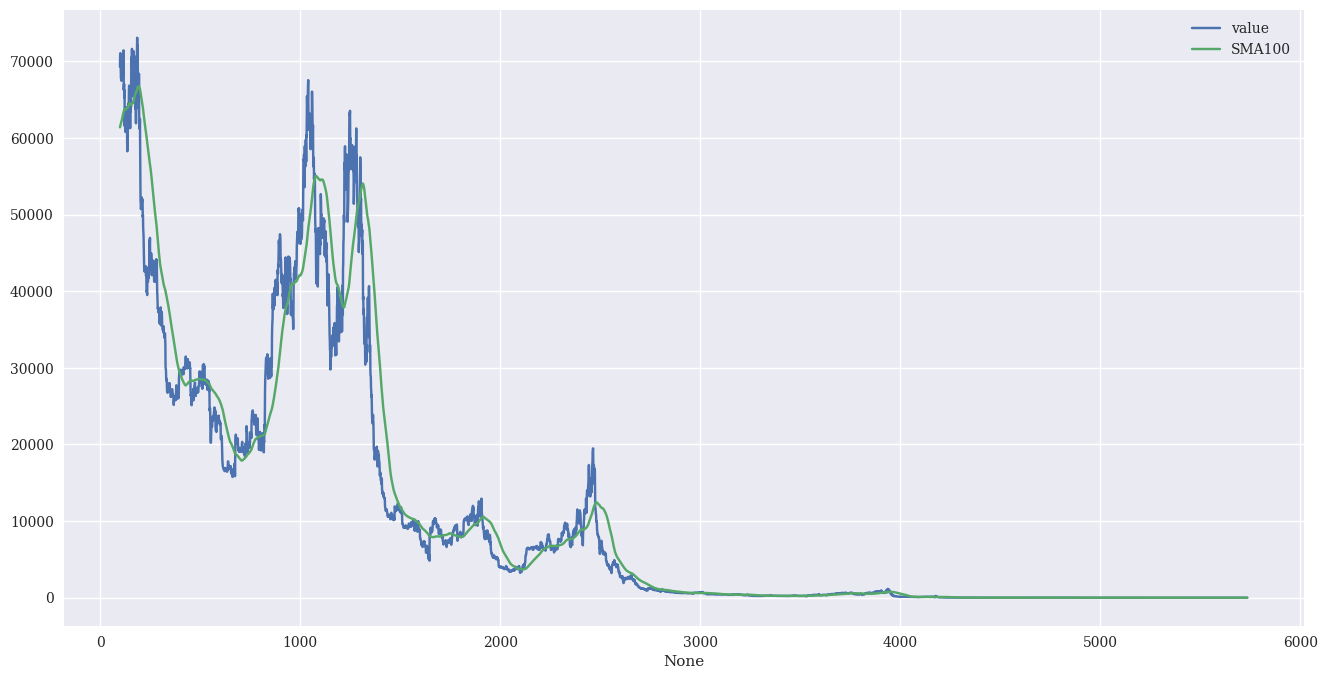

In [179]:
# Plotting Simple Moving Averages
# plotting close price (value) and simple moving average of 30 days using .plot() method
btc_value[['value', 'SMA100']].plot(label='BTC/USD exchange rate', figsize=(16, 8)) # doesn't look right

<Axes: title={'center': 'BTC/USD exchange rate'}, xlabel='None'>

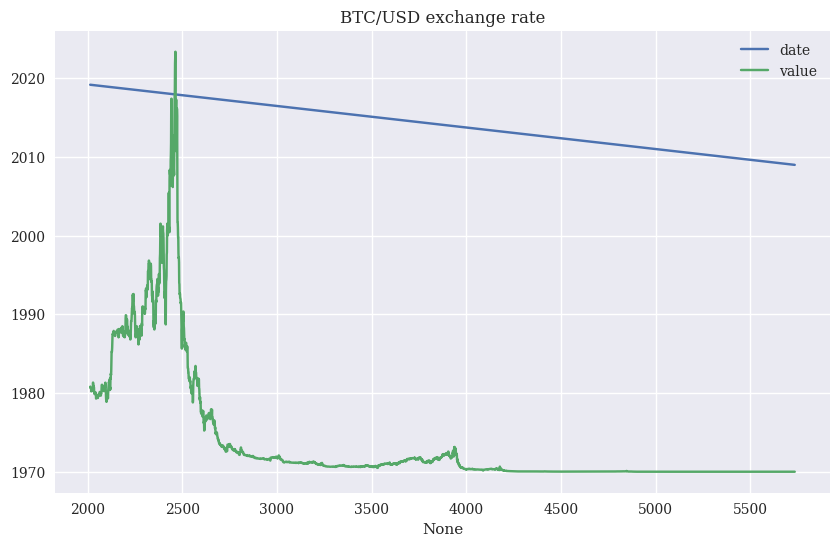

In [184]:
# calculation according to the example from Hilpisch's book
btc_data.loc['2013-10-10':].plot(title='BTC/USD exchange rate', figsize=(10, 6)) # doesn't look right either

In [181]:
# examples with date: different days
btc_data_date1 = nasdaqdatalink.get_table('QDL/BCHAIN', paginate=True, code="MKPRU", date="2016-07-17,2016-07-16,2016-07-15")
btc_data_date1

,code,date,value
None,,,
0,MKPRU,2016-07-17,675.45
1,MKPRU,2016-07-16,663.19
2,MKPRU,2016-07-15,664.57


In [182]:
# examples with date: single day
btc_data_date2 = nasdaqdatalink.get_table('QDL/BCHAIN', paginate=True, code="MKPRU", date="2018-07-17")
btc_data_date2

,code,date,value
None,,,
0,MKPRU,2018-07-17,6869.9108


In [183]:
# examples with date: range between days
btc_data_date3 = nasdaqdatalink.get_table('QDL/BCHAIN', paginate=True, code="MKPRU", date = { 'gte': '2016-01-01', 'lte': '2016-12-31' })
btc_data_date3

,code,date,value
None,,,
0,MKPRU,2016-12-31,958.12
1,MKPRU,2016-12-30,952.15
2,MKPRU,2016-12-29,963.38
3,MKPRU,2016-12-28,930.34
4,MKPRU,2016-12-27,930.37
...,...,...,...
361,MKPRU,2016-01-05,431.90
362,MKPRU,2016-01-04,433.00
363,MKPRU,2016-01-03,432.76
